In [62]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn.image import load_img, resample_to_img
from nilearn.plotting import view_img

data_dir = 'data'
spect_dir = os.path.join(data_dir, 'phantom_spect')
nifti_dir = os.path.join(data_dir, 'phantom_spect_nifti')

In [65]:
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(spect_dir)
print(dicom_names)
reader.SetFileNames(dicom_names)
image = reader.Execute()

print('Spacing:', image.GetSpacing())
print('Origin:', image.GetOrigin())
print('Direction:', image.GetDirection())

image = sitk.PermuteAxes(image, [2, 1, 0, 3])  # Permute axes to match NIfTI orientation
sitk.WriteImage(image, os.path.join(nifti_dir, 'phantom_spect.nii'))

('data\\phantom_spect/24410.0.52216046_5792.dcm',)
Spacing: (3.2956700325012, 3.2956700325012, 3.2956700325012, 1.0)
Origin: (-210.65241568532, -369.03986142166, -34.188960856046, 0.0)
Direction: (0.999985995532199, 0.005256339808509986, 0.0006161422679536135, 0.0, -0.005251900896024786, 0.9999617274251873, -0.006997229581325494, 0.0, -0.0006528985030001728, 0.006993895670719981, 0.9999753292691235, 0.0, 0.0, 0.0, 0.0, 1.0)


C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



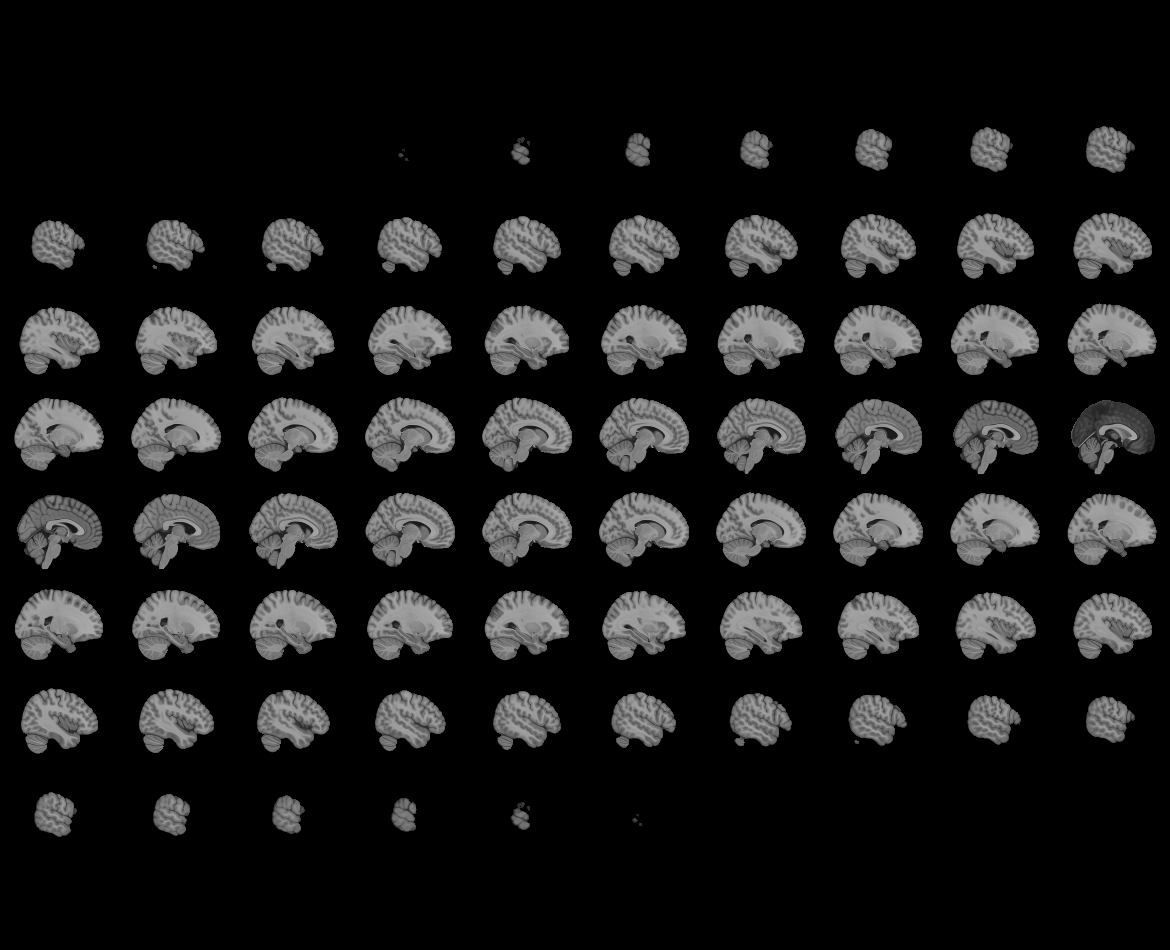
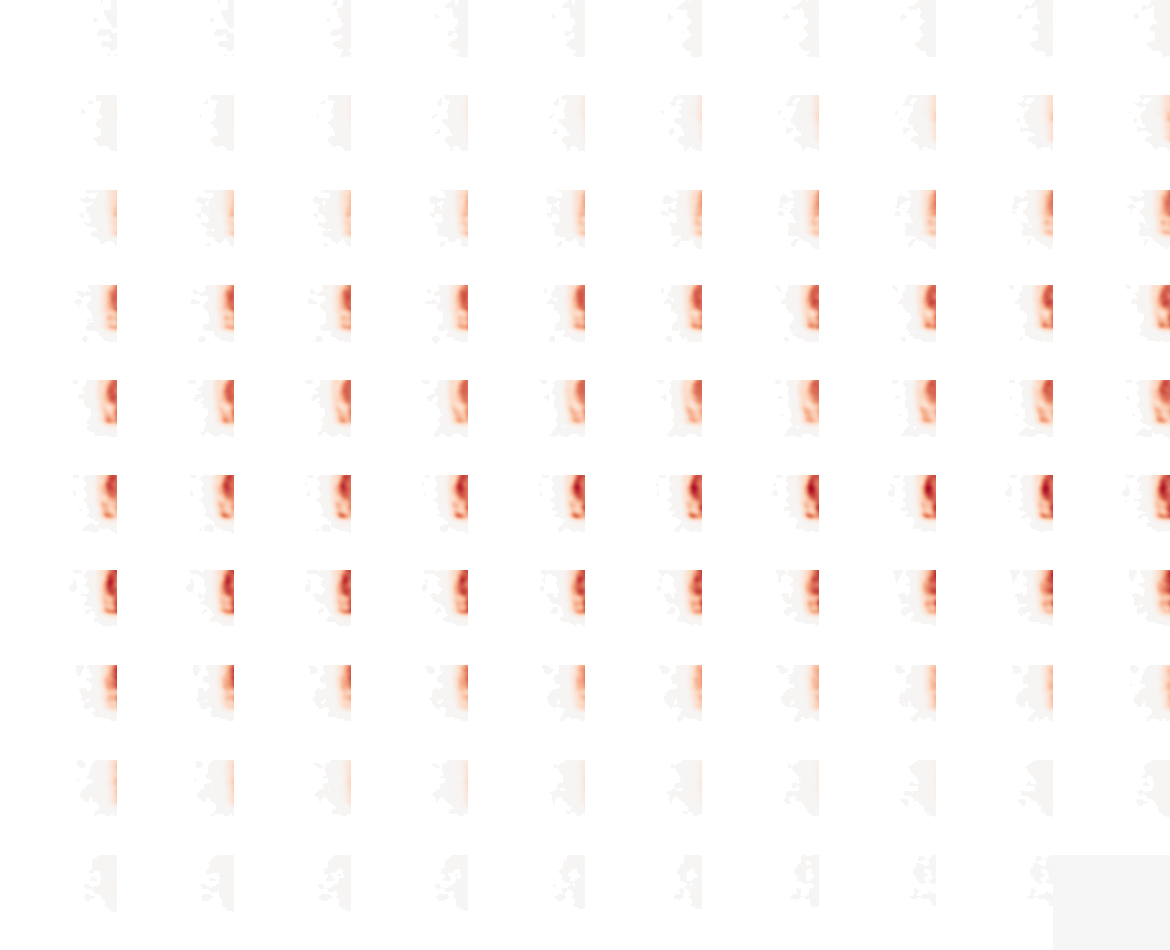

In [60]:
image = load_img(os.path.join(nifti_dir, 'phantom_spect.nii'))
view_img(image)

C:\Users\Dhruv Khanna\AppData\Local\Temp\ipykernel_23308\2989005235.py:2: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_image = resample_to_img(image, registration_img, copy_header=True)
C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



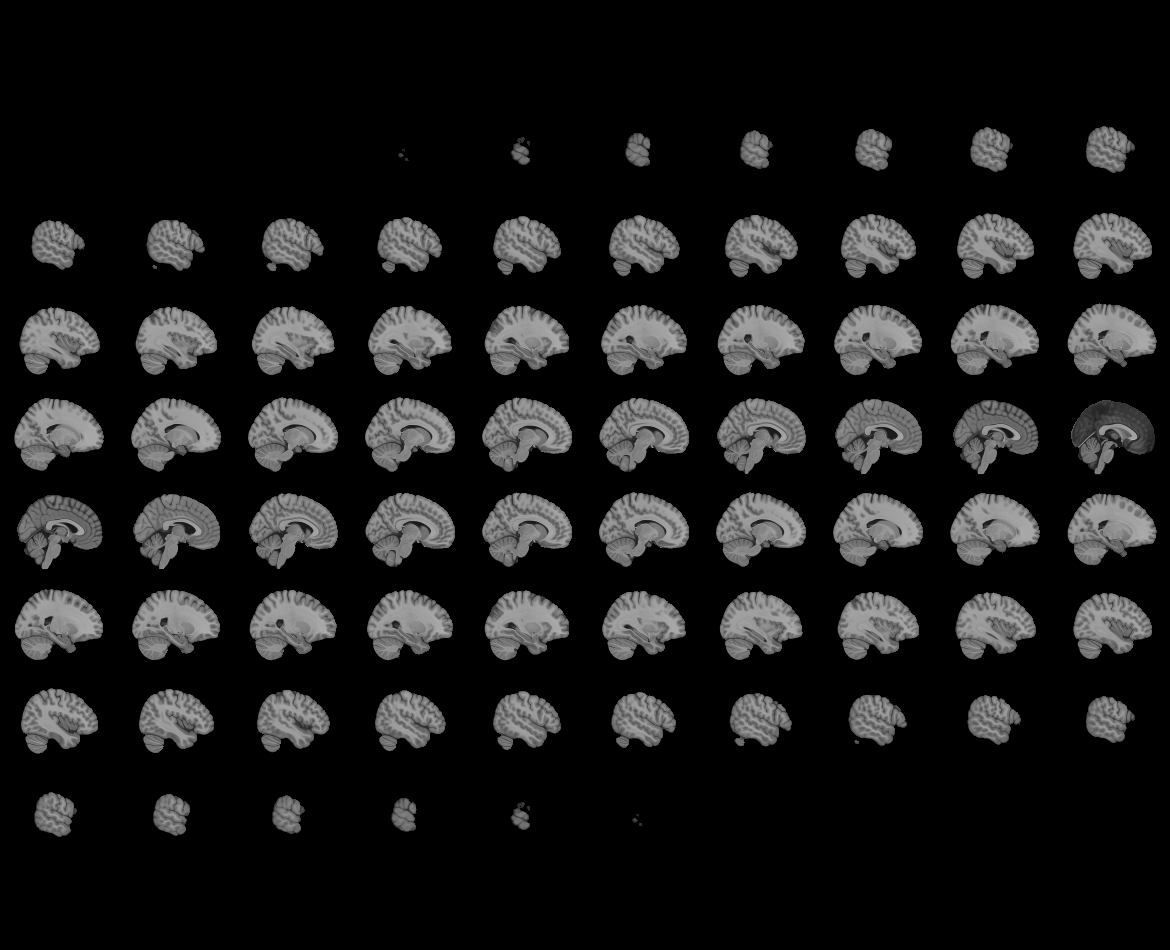
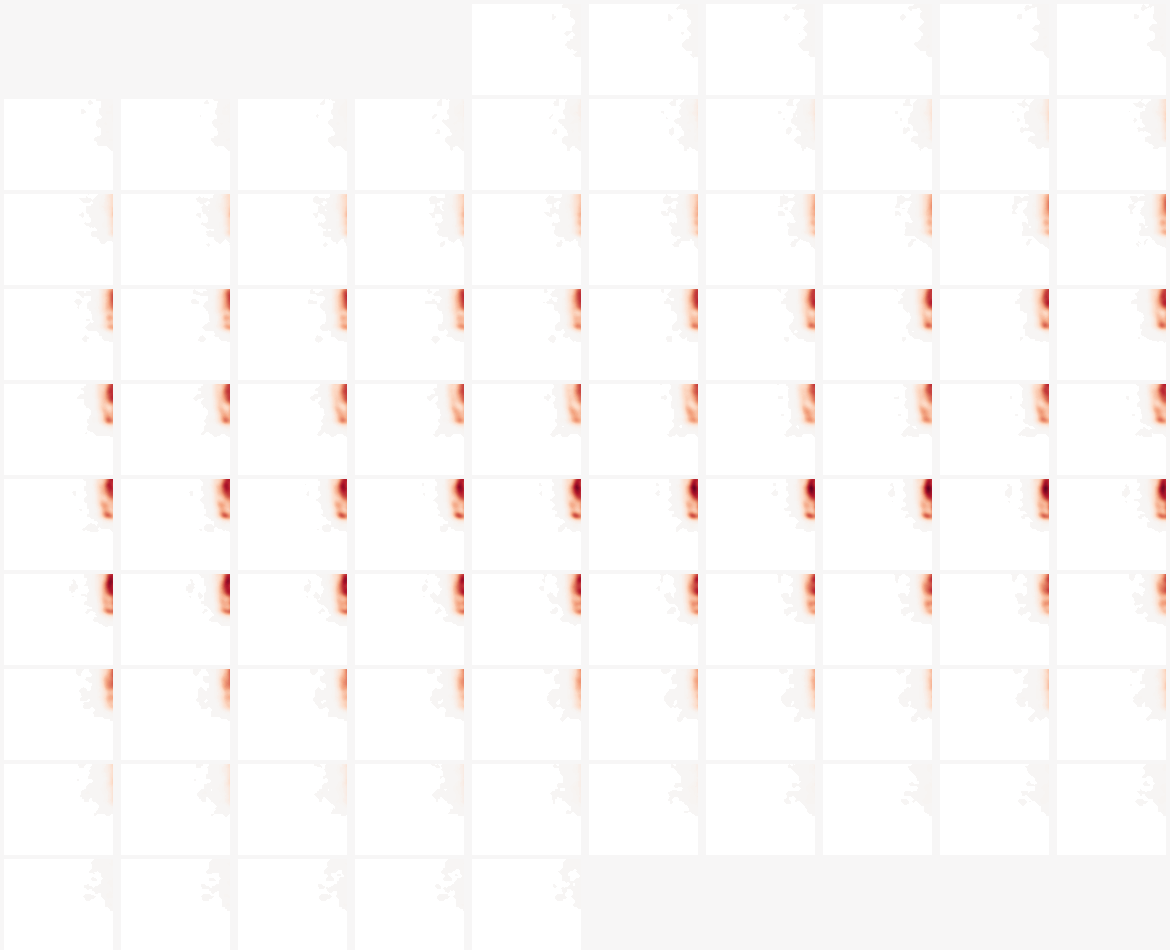

In [64]:
registration_img = load_img(os.path.join(data_dir, 'SPECT.nii'))
resampled_image = resample_to_img(image, registration_img, copy_header=True)
view_img(resampled_image, title='Resampled SPECT Image')
